In [1]:
import torch 
import torch.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
import os

transform = transforms.Compose([
	transforms.ToTensor(), 
	transforms.Resize((227, 227)), 
	transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

data_dir = os.path.join('.', 'data')

testset = torchvision.datasets.CIFAR10(root=data_dir + "/CIFAR10/test_CIFAR10", train=False, download=False, transform=transform)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.95511997..0.9278581].


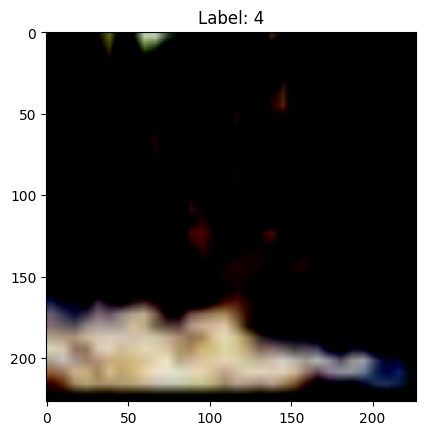

In [3]:
x, y = testset[890]
x = x.permute(1, 2, 0)
x = x.numpy()
plt.imshow(x)
plt.title(f"Label: {y}")
plt.show()

In [4]:
class Conv2d: 
	def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True):
		self.in_channels = in_channels
		self.out_channels = out_channels
		self.kernel_size = kernel_size if isinstance(kernel_size, tuple) else (kernel_size, kernel_size)
		self.stride = stride
		self.padding = padding
		self.bias = bias
        
		# Initialize weights and bias
		self.weights = torch.randn(out_channels, in_channels, *self.kernel_size, requires_grad=True)
		if bias:
			self.bias_param = torch.randn(out_channels, requires_grad=True)
		else:
			self.bias_param = None

	def forward(self, x): 
		if self.padding > 0: 
			x = F.pad(x, (self.padding, self.padding, self.padding, self.padding))

		batch_size, in_channels, in_height, in_width = x.shape

		out_height = (in_height - self.kernel_size[0]) // self.stride + 1
		out_width = (in_height - self.kernel_size[1]) // self.stride + 1

		out = torch.zeros((batch_size, self.out_channels, out_height, out_width))

		for b in range(batch_size): 
			for o in range(self.out_channels): 
				for i in range(0, in_height -self.kernel_size[0] + 1, self.stride): 
					for j in range(0, in_width - self.kernel_size[1] + 1, self.stride): 
						patch = x[b, : , i:i+self.kernel_size[0], j:j+self.kernel_size[1]]
						out[b, o, i//self.stride, j//self.stride] = (patch * self.weights[o]).sum()

						if self.bias: 
							out[b, o, i//self.stride, j//self.stride] += self.bias_param[0]

		return out


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7334688..0.83114207].


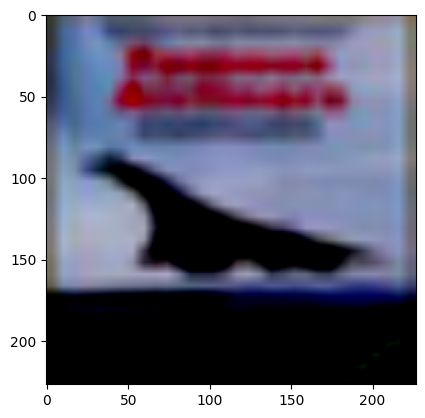

In [5]:
x, y = testset[3]
x = x.unsqueeze(0)
x = x.squeeze(0)
x = x.permute(1, 2, 0)
x = x.numpy()


plt.imshow(x)

In [11]:
conv = Conv2d(3, 3, 3, 1)

x, y = testset[3]
x = x.unsqueeze(0)
x.shape
x = x.detach()

out = conv.forward(x)
out = out.squeeze(0)
out.shape
out = out.permute(1, 2, 0)
out = out.detach().numpy()
plt.imshow(out)	

SyntaxError: invalid syntax (3673613567.py, line 12)